<a href="https://colab.research.google.com/github/geranitin/lending/blob/main/Bank_lending_and_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Pre-processing

In [ ]:
#load necessary modules

import numpy as np
import pandas as pd

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
%matplotlib inline
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
print("Setup Complete")

Setup Complete


In [ ]:
import os

# Print the contents of the current directory
print(os.listdir())

['.config', 'sample_data']


In [ ]:
#load data
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#glimpse data
#import pandas as pd
#import io
 
#banking = pd.read_csv(io.BytesIO(uploaded['dcr.csv']))
#income = pd.read_csv(io.BytesIO(uploaded['median_income_states.csv']))
#banking.head()

In [ ]:
#load data using github repo
url = (r'https://raw.githubusercontent.com/geranitin/lending/main/data/dcr.csv')
url1 = (r'https://raw.githubusercontent.com/geranitin/lending/main/data/median_income_states.csv')
banking= pd.read_csv(url)
income=pd.read_csv(url1)

Data variable description

Key variables include:



•	time: time stamp of observation
•	orig_time: time stamp for origination
•	first_time: time stamp for first observation
•	mat_time: time stamp for maturity
•	res_time: time stamp for resolution
•	balance_time: outstanding balance at observation time
•	LTV_time: loan to value ratio at observation time, in %
•	interest_rate_time: interest rate at observation time, in %
•	rate_time: risk-free rate
•	hpi_time: house price index at observation time, base year=100
•	gdp_time: GDP growth at observation time, in %
•	uer_time: unemployment rate at observation time, in %
•	REtype_CO_orig_time: real estate type condominium: 1, otherwise: 0
•	REtype_PU_orig_time: real estate type planned urban developments: 1, otherwise:0
•	REtype_SF_orig_time: single family home: 1, otherwise: 0
•	investor_orig_time: investor borrower: 1, otherwise: 0
•	balance_orig_time: outstanding balance at origination time
•	FICO_orig_time: FICO score at origination time, in %
•	LTV_orig_time: loan to value ratio at origination time, in %
•	Interest_Rate_orig_time: interest rate at origination time, in %
•	state_orig_time: US state in which the property is located
•	hpi_orig_time: house price index at observation time, base year=100
•	default_time: default observation at observation time
•	payoff_time: payoff observation at observation time
•	status_time: default (1), payoff (2) and non-default/non-payoff (0) observation at observation time
•	lgd_time: LGD assuming no discounting of cash flows
•	recovery_res: sum of all cash flows received during resolution period


In [ ]:
#Number of rows in data
banking.shape

(62178, 28)

In [ ]:
#load data
#from google.colab import files
#uploaded = files.upload()

Q1 (a) Explain qualitatively the role of borrower income on credit risk prediction in a maximum of 200 words.

It's important to understand the role of borrower income in credit risk prediction. Borrower income is a significant factor that influences their ability to repay the loan, and therefore, plays a critical role in determining the credit risk associated with a loan.

When analyzing the creditworthiness of a borrower, lenders use various inputs to assess the risk of default. The borrower's income is one such input that is considered along with other variables, such as credit history, employment status, loan purpose, and debt-to-income ratio. By analyzing these variables, lenders can form a comprehensive view of the borrower's creditworthiness and assess the likelihood of default.

A higher income generally implies a higher capacity to meet loan payments, reducing the risk of default. On the other hand, a lower income increases the risk of default, as the borrower may find it difficult to repay the loan. Therefore, banks and other lenders use the borrower's income, often expressed as a ratio to the loan amount (DTI ratio), to evaluate the risk of default associated with a loan.

In conclusion, understanding the critical role of borrower income in credit risk prediction is essential to make informed lending decisions that protect the interests of lenders while also ensuring that borrowers are not burdened with debt.

In [ ]:
#income = pd.read_csv(io.BytesIO(uploaded['median_income_states.csv']))
income.head(10)


,Year,United States,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2001,42228,35160,57363,42704,33339,47262,49397,53347,49602,...,39671,35783,40860,47342,40794,50241,42490,29673,45346,39719
1,2002,42409,37603,52774,39734,32387,47437,48294,53387,49650,...,37873,37030,40149,47861,42999,49631,45183,29359,45903,39763
2,2003,43318,37255,51837,41166,32002,49300,49940,54965,49019,...,39522,37523,39271,49275,43261,54783,47508,32763,46269,42555
3,2004,44334,36629,55063,43846,34984,49222,50886,55100,48049,...,41107,38072,41397,50871,47329,51141,49922,33373,45732,45397
4,2005,46326,37150,55891,45245,36658,51755,50449,56835,51235,...,43151,39406,41422,54813,50704,51914,50646,36445,44650,44718
5,2006,48201,37952,56418,46657,37057,55319,55697,62404,52438,...,45427,40693,43307,54628,51981,57119,54723,38419,51692,47041
6,2007,50233,42212,62993,47215,40795,55734,61141,64141,54589,...,46418,41195,46053,53529,47390,59161,58080,42091,51277,48744
7,2008,50303,44476,63989,46914,39586,57014,60943,64682,50702,...,51600,39702,46490,62537,50706,61985,56631,37994,51200,53337
8,2009,49777,39980,61604,45739,36538,56134,55930,64851,52114,...,45826,40517,47475,58491,52318,60501,60392,40490,51237,52470
9,2010,49276,40933,57848,46896,38587,54283,60233,65998,55214,...,45352,38591,47266,56701,55928,60367,56163,42777,50351,52201


In [ ]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Year                  15 non-null     int64
 1   United States         15 non-null     int64
 2   Alabama               15 non-null     int64
 3   Alaska                15 non-null     int64
 4   Arizona               15 non-null     int64
 5   Arkansas              15 non-null     int64
 6   California            15 non-null     int64
 7   Colorado              15 non-null     int64
 8   Connecticut           15 non-null     int64
 9   Delaware              15 non-null     int64
 10  District of Columbia  15 non-null     int64
 11  Florida               15 non-null     int64
 12  Georgia               15 non-null     int64
 13  Hawaii                15 non-null     int64
 14  Idaho                 15 non-null     int64
 15  Illinois              15 non-null     int64
 16  Indiana   

In [ ]:
#normlize col names
income.columns = income.columns.str.lower().str.replace(' ', '_')

In [ ]:
income.info()
income.set_index('year',inplace=True)
income.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   year                  15 non-null     int64
 1   united_states         15 non-null     int64
 2   alabama               15 non-null     int64
 3   alaska                15 non-null     int64
 4   arizona               15 non-null     int64
 5   arkansas              15 non-null     int64
 6   california            15 non-null     int64
 7   colorado              15 non-null     int64
 8   connecticut           15 non-null     int64
 9   delaware              15 non-null     int64
 10  district_of_columbia  15 non-null     int64
 11  florida               15 non-null     int64
 12  georgia               15 non-null     int64
 13  hawaii                15 non-null     int64
 14  idaho                 15 non-null     int64
 15  illinois              15 non-null     int64
 16  indiana   

,united_states,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,district_of_columbia,...,south_dakota,tennessee,texas,utah,vermont,virginia,washington,west_virginia,wisconsin,wyoming
year,,,,,,,,,,,,,,,,,,,,,
2001,42228,35160,57363,42704,33339,47262,49397,53347,49602,41169,...,39671,35783,40860,47342,40794,50241,42490,29673,45346,39719
2002,42409,37603,52774,39734,32387,47437,48294,53387,49650,39070,...,37873,37030,40149,47861,42999,49631,45183,29359,45903,39763
2003,43318,37255,51837,41166,32002,49300,49940,54965,49019,45044,...,39522,37523,39271,49275,43261,54783,47508,32763,46269,42555
2004,44334,36629,55063,43846,34984,49222,50886,55100,48049,43451,...,41107,38072,41397,50871,47329,51141,49922,33373,45732,45397
2005,46326,37150,55891,45245,36658,51755,50449,56835,51235,44993,...,43151,39406,41422,54813,50704,51914,50646,36445,44650,44718


Q 1(b) Describe the data using the describe method in pandas and plot the time series usingmatplotlib. Interpret all outputs economically. Interpolate missing years 

In [ ]:
income.describe()

,united_states,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,district_of_columbia,...,south_dakota,tennessee,texas,utah,vermont,virginia,washington,west_virginia,wisconsin,wyoming
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,48748.933333,40634.066667,60804.800000,46392.933333,37956.600000,54584.266667,56949.466667,62514.200000,52374.200000,53169.866667,...,46274.400000,40546.200000,46427.800000,56038.000000,51771.266667,58509.266667,55400.533333,38280.200000,50268.333333,50801.466667
std,4296.829753,3565.355532,6888.308762,3598.539832,3765.844011,4945.346708,6205.350754,6324.358728,3132.976134,9744.398925,...,5420.466925,3042.342993,5358.125714,5747.581653,6926.002109,5714.118273,7046.313108,4904.978887,3938.114463,7885.205739
min,42228.000000,35160.000000,51837.000000,39734.000000,32002.000000,47262.000000,48294.000000,53347.000000,48049.000000,39070.000000,...,37873.000000,35783.000000,39271.000000,47342.000000,40794.000000,49631.000000,42490.000000,29359.000000,44650.000000,39719.000000
25%,45330.000000,37429.000000,56154.500000,44545.500000,35761.000000,50527.500000,50667.500000,55967.500000,49626.000000,45018.500000,...,42129.000000,38331.500000,41409.500000,52200.000000,47359.500000,53348.500000,50284.000000,34909.000000,46086.000000,45057.500000
50%,49777.000000,40933.000000,57848.000000,46896.000000,38587.000000,55319.000000,57255.000000,64247.000000,52114.000000,53141.000000,...,45826.000000,40517.000000,46490.000000,55493.000000,51862.000000,60367.000000,56631.000000,39552.000000,51237.000000,52201.000000
75%,50660.000000,43027.000000,63818.500000,47918.000000,40190.500000,57017.000000,60941.500000,65706.500000,54624.500000,58492.500000,...,50507.500000,42637.000000,50226.500000,59769.000000,55755.000000,62300.500000,59730.000000,42434.000000,51892.000000,55099.500000
max,56516.000000,47320.000000,75112.000000,52611.000000,44922.000000,63636.000000,67912.000000,72889.000000,57756.000000,70071.000000,...,55065.000000,47330.000000,56473.000000,66258.000000,65513.000000,66155.000000,67243.000000,43553.000000,58080.000000,67441.000000


From the statistics, we can see that the average income in the US over the 15-year period is $48,748, with a standard deviation of 4,296. The median income is 49,777, which is slightly higher than the mean, indicating a slightly skewed distribution towards the lower end. We can also see that there is significant variability in income levels across states, with Alaska having the highest average income of 60,804 and West Virginia having the lowest average income of 38,280.

Text(0.5, 1.0, 'Median Income for US Borrowers')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Income')

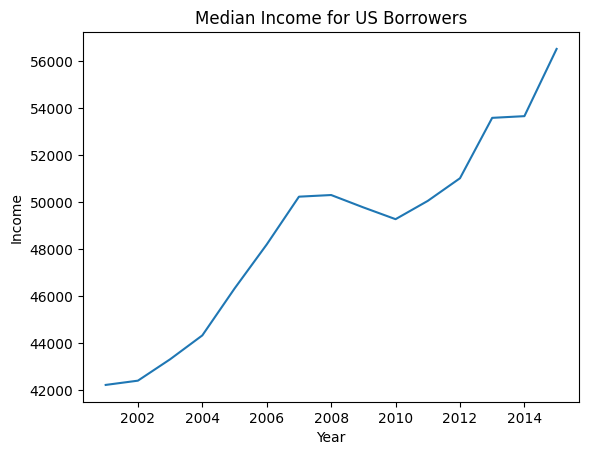

In [ ]:
# plot time-series
plt.plot(income.index, income['united_states'])
plt.title('Median Income for US Borrowers')
plt.xlabel('Year')
plt.ylabel('Income')
plt.show()

Interpretation: The plot shows that median income for US borrowers has generally been increasing over the years, with some fluctuations. There was a dip in median income during the 2008 recession, but it has since recovered and continued to increase. There is no missing year in the data.However for 2013 year the later survey median income based on 2014 CPS AESC was considered.

In [ ]:
growth_rate = income.pct_change()

In [ ]:
growth_rate.head(15)

,united_states,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,district_of_columbia,...,south_dakota,tennessee,texas,utah,vermont,virginia,washington,west_virginia,wisconsin,wyoming
year,,,,,,,,,,,,,,,,,,,,,
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,0.004286,0.069482,-0.079999,-0.069549,-0.028555,0.003703,-0.022329,0.000750,0.000968,-0.050985,...,-0.045323,0.034849,-0.017401,0.010963,0.054052,-0.012141,0.063380,-0.010582,0.012283,0.001108
2003,0.021434,-0.009255,-0.017755,0.036040,-0.011887,0.039273,0.034083,0.029558,-0.012709,0.152905,...,0.043540,0.013314,-0.021869,0.029544,0.006093,0.103806,0.051457,0.115944,0.007973,0.070216
2004,0.023454,-0.016803,0.062234,0.065102,0.093182,-0.001582,0.018943,0.002456,-0.019788,-0.035365,...,0.040104,0.014631,0.054137,0.032390,0.094034,-0.066480,0.050812,0.018619,-0.011606,0.066784
2005,0.044932,0.014224,0.015037,0.031907,0.047850,0.051461,-0.008588,0.031488,0.066307,0.035488,...,0.049724,0.035039,0.000604,0.077490,0.071309,0.015115,0.014503,0.092050,-0.023660,-0.014957
2006,0.040474,0.021588,0.009429,0.031208,0.010884,0.068863,0.104026,0.097985,0.023480,0.077434,...,0.052745,0.032660,0.045507,-0.003375,0.025185,0.100262,0.080500,0.054164,0.157716,0.051948
2007,0.042157,0.112247,0.116541,0.011960,0.100872,0.007502,0.097743,0.027835,0.041020,0.047569,...,0.021815,0.012336,0.063408,-0.020118,-0.088321,0.035750,0.061345,0.095578,-0.008028,0.036202
2008,0.001394,0.053634,0.015811,-0.006375,-0.029636,0.022966,-0.003238,0.008435,-0.071205,0.094658,...,0.111638,-0.036242,0.009489,0.168283,0.069973,0.047734,-0.024948,-0.097337,-0.001502,0.094227
2009,-0.010457,-0.101088,-0.037272,-0.025046,-0.076997,-0.015435,-0.082257,0.002613,0.027849,-0.044055,...,-0.111899,0.020528,0.021187,-0.064698,0.031791,-0.023941,0.066412,0.065695,0.000723,-0.016255


In [ ]:
#remove 1st row
growth_rate = growth_rate.drop(growth_rate.index[0])

In [ ]:
growth_rate.head()

,united_states,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,district_of_columbia,...,south_dakota,tennessee,texas,utah,vermont,virginia,washington,west_virginia,wisconsin,wyoming
year,,,,,,,,,,,,,,,,,,,,,
2002,0.004286,0.069482,-0.079999,-0.069549,-0.028555,0.003703,-0.022329,0.000750,0.000968,-0.050985,...,-0.045323,0.034849,-0.017401,0.010963,0.054052,-0.012141,0.063380,-0.010582,0.012283,0.001108
2003,0.021434,-0.009255,-0.017755,0.036040,-0.011887,0.039273,0.034083,0.029558,-0.012709,0.152905,...,0.043540,0.013314,-0.021869,0.029544,0.006093,0.103806,0.051457,0.115944,0.007973,0.070216
2004,0.023454,-0.016803,0.062234,0.065102,0.093182,-0.001582,0.018943,0.002456,-0.019788,-0.035365,...,0.040104,0.014631,0.054137,0.032390,0.094034,-0.066480,0.050812,0.018619,-0.011606,0.066784
2005,0.044932,0.014224,0.015037,0.031907,0.047850,0.051461,-0.008588,0.031488,0.066307,0.035488,...,0.049724,0.035039,0.000604,0.077490,0.071309,0.015115,0.014503,0.092050,-0.023660,-0.014957
2006,0.040474,0.021588,0.009429,0.031208,0.010884,0.068863,0.104026,0.097985,0.023480,0.077434,...,0.052745,0.032660,0.045507,-0.003375,0.025185,0.100262,0.080500,0.054164,0.157716,0.051948


Text(0.5, 1.0, 'grwth rate for US income over the time')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'growth rate')

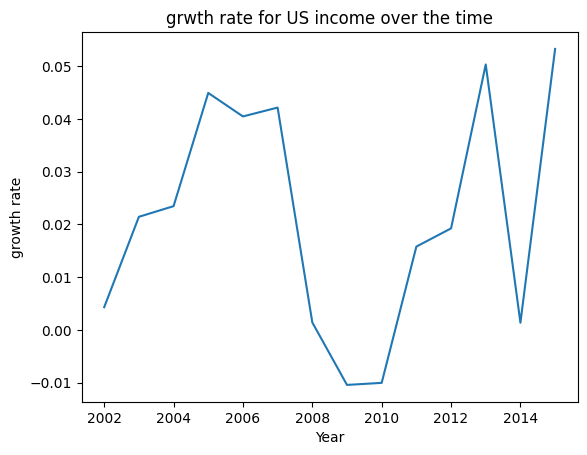

In [ ]:
# plot time-series
plt.plot(growth_rate.index, growth_rate['united_states'])
plt.title('grwth rate for US income over the time')
plt.xlabel('Year')
plt.ylabel('growth rate')
plt.show()

In [ ]:
max_state = growth_rate.mean().idxmax()
print(max_state)
min_state = growth_rate.mean().idxmin()
print(min_state)

district_of_columbia
kentucky


Text(0.5, 1.0, 'grwth rate for DC state income over the time')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'growth rate')

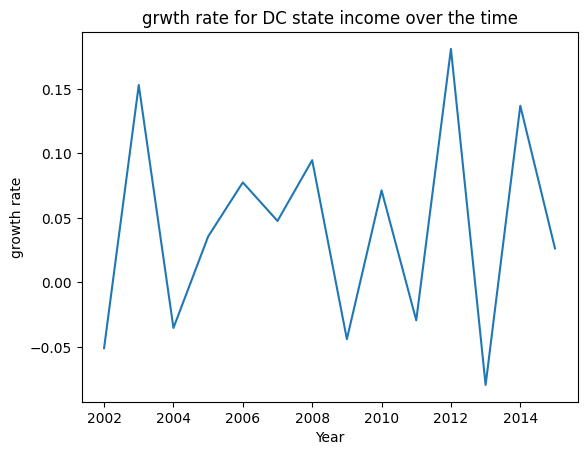

Text(0.5, 1.0, 'grwth rate for kentucky state income over the time')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'growth rate')

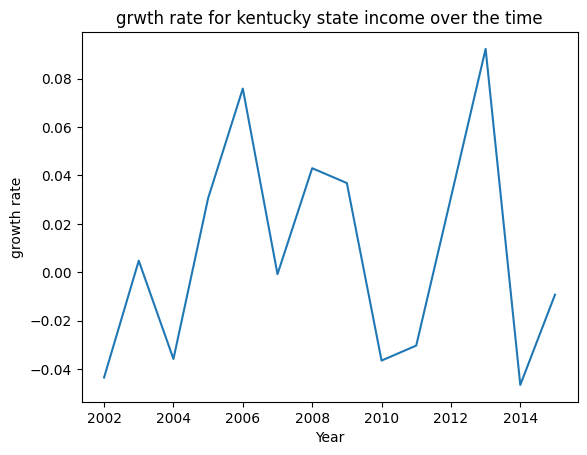

In [ ]:
#plot grwoth time series plot for states having max and min grwth
# plot time-series for max state
plt.plot(growth_rate.index, growth_rate['district_of_columbia'])
plt.title('grwth rate for DC state income over the time')
plt.xlabel('Year')
plt.ylabel('growth rate')
plt.show()

# for min state
plt.plot(growth_rate.index, growth_rate['kentucky'])
plt.title('grwth rate for kentucky state income over the time')
plt.xlabel('Year')
plt.ylabel('growth rate')
plt.show()


growth rate for US started decreasing since 2007 at the time when GFC hit.It started increasing year 2010 onwards.Also displayed is the growth rate for highest and lowest state growth rate.

In [ ]:
#banking.head()
#banking["state_orig_time"].unique()
#banking.info()

In [ ]:
banking.head()

,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,...,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,lgd_time,recovery_res
0,4,25,-2,25,119,NaN,61031.10,33.911009,10.500,5.9,...,587,81.8,10.5,KY,97.99,0,0,0,NaN,NaN
1,4,26,-2,25,119,NaN,60882.42,34.007232,10.500,5.9,...,587,81.8,10.5,KY,97.99,0,0,0,NaN,NaN
2,4,27,-2,25,119,NaN,60729.80,34.335349,10.500,5.9,...,587,81.8,10.5,KY,97.99,0,0,0,NaN,NaN
3,4,28,-2,25,119,NaN,60576.14,34.672545,10.875,5.9,...,587,81.8,10.5,KY,97.99,0,0,0,NaN,NaN
4,4,29,-2,25,119,NaN,60424.39,34.951639,10.875,5.9,...,587,81.8,10.5,KY,97.99,0,0,0,NaN,NaN


In [ ]:
income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 2001 to 2015
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   united_states         15 non-null     int64
 1   alabama               15 non-null     int64
 2   alaska                15 non-null     int64
 3   arizona               15 non-null     int64
 4   arkansas              15 non-null     int64
 5   california            15 non-null     int64
 6   colorado              15 non-null     int64
 7   connecticut           15 non-null     int64
 8   delaware              15 non-null     int64
 9   district_of_columbia  15 non-null     int64
 10  florida               15 non-null     int64
 11  georgia               15 non-null     int64
 12  hawaii                15 non-null     int64
 13  idaho                 15 non-null     int64
 14  illinois              15 non-null     int64
 15  indiana               15 non-null     int64
 16  iowa 

In [ ]:
income.head()

,united_states,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,district_of_columbia,...,south_dakota,tennessee,texas,utah,vermont,virginia,washington,west_virginia,wisconsin,wyoming
year,,,,,,,,,,,,,,,,,,,,,
2001,42228,35160,57363,42704,33339,47262,49397,53347,49602,41169,...,39671,35783,40860,47342,40794,50241,42490,29673,45346,39719
2002,42409,37603,52774,39734,32387,47437,48294,53387,49650,39070,...,37873,37030,40149,47861,42999,49631,45183,29359,45903,39763
2003,43318,37255,51837,41166,32002,49300,49940,54965,49019,45044,...,39522,37523,39271,49275,43261,54783,47508,32763,46269,42555
2004,44334,36629,55063,43846,34984,49222,50886,55100,48049,43451,...,41107,38072,41397,50871,47329,51141,49922,33373,45732,45397
2005,46326,37150,55891,45245,36658,51755,50449,56835,51235,44993,...,43151,39406,41422,54813,50704,51914,50646,36445,44650,44718


In [ ]:
income.columns

Index(['united_states', 'alabama', 'alaska', 'arizona', 'arkansas',
       'california', 'colorado', 'connecticut', 'delaware',
       'district_of_columbia', 'florida', 'georgia', 'hawaii', 'idaho',
       'illinois', 'indiana', 'iowa', 'kansas', 'kentucky', 'louisiana',
       'maine', 'maryland', 'massachusetts', 'michigan', 'minnesota',
       'mississippi', 'missouri', 'montana', 'nebraska', 'nevada',
       'new_hampshire', 'new_jersey', 'new_mexico', 'new_york',
       'north_carolina', 'north_dakota', 'ohio', 'oklahoma', 'oregon',
       'pennsylvania', 'rhode_island', 'south_carolina', 'south_dakota',
       'tennessee', 'texas', 'utah', 'vermont', 'virginia', 'washington',
       'west_virginia', 'wisconsin', 'wyoming'],
      dtype='object')

In [ ]:
#merge the datasets income and banking using state and time
#create a temp variable which acts as common key across both Dfs
# Create a dictionary to map state names to two-letter strings
state_dict = {'united_states':'US', 'alabama': 'AL', 'alaska': 'AK', 'arizona': 'AZ', 'arkansas': 'AR', 'california': 'CA', 'colorado': 'CO', 'connecticut': 'CT', 'delaware': 'DE', 'district_of_columbia': 'DC', 'florida': 'FL', 'georgia': 'GA', 'hawaii': 'HI', 'idaho': 'ID', 'illinois': 'IL', 'indiana': 'IN', 'iowa': 'IA', 'kansas': 'KS', 'kentucky': 'KY', 'louisiana': 'LA', 'maine': 'ME', 'maryland': 'MD', 'massachusetts': 'MA', 'michigan': 'MI', 'minnesota': 'MN', 'mississippi': 'MS', 'missouri': 'MO', 'montana': 'MT', 'nebraska': 'NE', 'nevada': 'NV', 'new_hampshire': 'NH', 'new_jersey': 'NJ', 'new_mexico': 'NM', 'new_york': 'NY', 'north_carolina': 'NC', 'north_dakota': 'ND', 'ohio': 'OH', 'oklahoma': 'OK', 'oregon': 'OR', 'pennsylvania': 'PA', 'rhode_island': 'RI', 'south_carolina': 'SC', 'south_dakota': 'SD', 'tennessee': 'TN', 'texas': 'TX', 'utah': 'UT', 'vermont': 'VT', 'virginia': 'VA', 'washington': 'WA', 'west_virginia': 'WV', 'wisconsin': 'WI', 'wyoming': 'WY'}

# Rename the columns in the income dataset using the state_dict
income.columns = [state_dict[col.lower()] for col in income.columns]


In [ ]:
income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 2001 to 2015
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   US      15 non-null     int64
 1   AL      15 non-null     int64
 2   AK      15 non-null     int64
 3   AZ      15 non-null     int64
 4   AR      15 non-null     int64
 5   CA      15 non-null     int64
 6   CO      15 non-null     int64
 7   CT      15 non-null     int64
 8   DE      15 non-null     int64
 9   DC      15 non-null     int64
 10  FL      15 non-null     int64
 11  GA      15 non-null     int64
 12  HI      15 non-null     int64
 13  ID      15 non-null     int64
 14  IL      15 non-null     int64
 15  IN      15 non-null     int64
 16  IA      15 non-null     int64
 17  KS      15 non-null     int64
 18  KY      15 non-null     int64
 19  LA      15 non-null     int64
 20  ME      15 non-null     int64
 21  MD      15 non-null     int64
 22  MA      15 non-null     int64
 23  MI      15 n

In [ ]:
income.head()

,US,AL,AK,AZ,AR,CA,CO,CT,DE,DC,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
year,,,,,,,,,,,,,,,,,,,,,
2001,42228,35160,57363,42704,33339,47262,49397,53347,49602,41169,...,39671,35783,40860,47342,40794,50241,42490,29673,45346,39719
2002,42409,37603,52774,39734,32387,47437,48294,53387,49650,39070,...,37873,37030,40149,47861,42999,49631,45183,29359,45903,39763
2003,43318,37255,51837,41166,32002,49300,49940,54965,49019,45044,...,39522,37523,39271,49275,43261,54783,47508,32763,46269,42555
2004,44334,36629,55063,43846,34984,49222,50886,55100,48049,43451,...,41107,38072,41397,50871,47329,51141,49922,33373,45732,45397
2005,46326,37150,55891,45245,36658,51755,50449,56835,51235,44993,...,43151,39406,41422,54813,50704,51914,50646,36445,44650,44718


In [ ]:
# make year a col instead of index
income=income.reset_index()

In [ ]:
income.head()

,year,US,AL,AK,AZ,AR,CA,CO,CT,DE,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
0,2001,42228,35160,57363,42704,33339,47262,49397,53347,49602,...,39671,35783,40860,47342,40794,50241,42490,29673,45346,39719
1,2002,42409,37603,52774,39734,32387,47437,48294,53387,49650,...,37873,37030,40149,47861,42999,49631,45183,29359,45903,39763
2,2003,43318,37255,51837,41166,32002,49300,49940,54965,49019,...,39522,37523,39271,49275,43261,54783,47508,32763,46269,42555
3,2004,44334,36629,55063,43846,34984,49222,50886,55100,48049,...,41107,38072,41397,50871,47329,51141,49922,33373,45732,45397
4,2005,46326,37150,55891,45245,36658,51755,50449,56835,51235,...,43151,39406,41422,54813,50704,51914,50646,36445,44650,44718


In [ ]:
banking['state_time'] = banking['state_orig_time'].astype(str) + '_' + ((banking['time'] - 1) // 4 + 2001).astype(str)


In [ ]:
banking['state_time'].value_counts()
banking.head()
banking["state_orig_time"].unique()
banking.info()

CA_2008    2113
CA_2007    1754
CA_2009    1711
CA_2010    1229
CA_2006    1193
           ... 
ND_2007       1
ME_2003       1
KS_2004       1
UT_2003       1
HI_2004       1
Name: state_time, Length: 684, dtype: int64

,id,time,orig_time,first_time,mat_time,res_time,balance_time,LTV_time,interest_rate_time,rate_time,...,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,lgd_time,recovery_res,state_time
0,4,25,-2,25,119,NaN,61031.10,33.911009,10.500,5.9,...,81.8,10.5,KY,97.99,0,0,0,NaN,NaN,KY_2007
1,4,26,-2,25,119,NaN,60882.42,34.007232,10.500,5.9,...,81.8,10.5,KY,97.99,0,0,0,NaN,NaN,KY_2007
2,4,27,-2,25,119,NaN,60729.80,34.335349,10.500,5.9,...,81.8,10.5,KY,97.99,0,0,0,NaN,NaN,KY_2007
3,4,28,-2,25,119,NaN,60576.14,34.672545,10.875,5.9,...,81.8,10.5,KY,97.99,0,0,0,NaN,NaN,KY_2007
4,4,29,-2,25,119,NaN,60424.39,34.951639,10.875,5.9,...,81.8,10.5,KY,97.99,0,0,0,NaN,NaN,KY_2008


array(['KY', 'CO', 'GA', 'TN', 'CA', 'AL', 'NJ', 'DC', 'NC', 'NY', 'FL',
       'WA', 'MD', 'AZ', 'SC', 'MN', 'TX', 'VA', 'OH', 'CT', 'ME', 'MI',
       'WI', 'PA', 'OK', 'NV', 'MA', 'LA', 'IL', 'NE', 'ND', 'MO', 'MT',
       'AR', 'OR', 'NM', 'UT', 'IA', 'SD', 'ID', 'HI', 'RI', 'IN', 'WV',
       'VT', 'MS', 'NH', 'DE', nan, 'KS', 'WY', 'PR', 'AK'], dtype=object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62178 entries, 0 to 62177
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       62178 non-null  int64  
 1   time                     62178 non-null  int64  
 2   orig_time                62178 non-null  int64  
 3   first_time               62178 non-null  int64  
 4   mat_time                 62178 non-null  int64  
 5   res_time                 1160 non-null   float64
 6   balance_time             62178 non-null  float64
 7   LTV_time                 62153 non-null  float64
 8   interest_rate_time       62178 non-null  float64
 9   rate_time                62178 non-null  float64
 10  hpi_time                 62178 non-null  float64
 11  gdp_time                 62178 non-null  float64
 12  uer_time                 62178 non-null  float64
 13  REtype_CO_orig_time      62178 non-null  int64  
 14  REtype_PU_orig_time   

In [ ]:
income.head()

,year,US,AL,AK,AZ,AR,CA,CO,CT,DE,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
0,2001,42228,35160,57363,42704,33339,47262,49397,53347,49602,...,39671,35783,40860,47342,40794,50241,42490,29673,45346,39719
1,2002,42409,37603,52774,39734,32387,47437,48294,53387,49650,...,37873,37030,40149,47861,42999,49631,45183,29359,45903,39763
2,2003,43318,37255,51837,41166,32002,49300,49940,54965,49019,...,39522,37523,39271,49275,43261,54783,47508,32763,46269,42555
3,2004,44334,36629,55063,43846,34984,49222,50886,55100,48049,...,41107,38072,41397,50871,47329,51141,49922,33373,45732,45397
4,2005,46326,37150,55891,45245,36658,51755,50449,56835,51235,...,43151,39406,41422,54813,50704,51914,50646,36445,44650,44718


In [ ]:
income_long = pd.melt(income, id_vars='year', var_name='state', value_name='income')
income_long['state_time'] =  income_long['state']+ '_' + income_long['year'].astype(str)

In [ ]:
income_long.head(20)

,year,state,income,state_time
0,2001,US,42228,US_2001
1,2002,US,42409,US_2002
2,2003,US,43318,US_2003
3,2004,US,44334,US_2004
4,2005,US,46326,US_2005
5,2006,US,48201,US_2006
6,2007,US,50233,US_2007
7,2008,US,50303,US_2008
8,2009,US,49777,US_2009
9,2010,US,49276,US_2010


In [ ]:
banking["state_time"].head()

0    KY_2007
1    KY_2007
2    KY_2007
3    KY_2007
4    KY_2008
Name: state_time, dtype: object

In [ ]:
#merge the dataset income and banking
banking_income = pd.merge(income_long, banking, on='state_time')

In [ ]:
banking_income.head()

,year,state,income,state_time,id,time,orig_time,first_time,mat_time,res_time,...,FICO_orig_time,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,lgd_time,recovery_res
0,2005,AL,37150,AL_2005,759,19,19,19,133,NaN,...,645,80.0,0.00,AL,191.42,0,0,0,NaN,NaN
1,2005,AL,37150,AL_2005,759,20,19,19,133,NaN,...,645,80.0,0.00,AL,191.42,0,0,0,NaN,NaN
2,2005,AL,37150,AL_2005,1947,18,11,18,131,30.0,...,618,75.0,8.25,AL,142.18,1,0,1,0.314656,53504.42
3,2005,AL,37150,AL_2005,13352,18,18,18,35,NaN,...,511,86.1,10.99,AL,186.91,0,0,0,NaN,NaN
4,2005,AL,37150,AL_2005,13352,19,18,18,35,NaN,...,511,86.1,10.99,AL,186.91,0,0,0,NaN,NaN


In [ ]:
#checking the merged data for integrity
banking_income.loc[:,["time","year","state","income","state_time","state_orig_time","LTV_time","orig_time","gdp_time"]].tail(20)

,time,year,state,income,state_time,state_orig_time,LTV_time,orig_time,gdp_time
61394,41,2011,WY,54509,WY_2011,WY,76.256771,16,2.682497
61395,42,2011,WY,54509,WY_2011,WY,75.817163,16,3.029499
61396,43,2011,WY,54509,WY_2011,WY,77.739242,16,2.694111
61397,44,2011,WY,54509,WY_2011,WY,79.897387,16,1.875515
61398,45,2012,WY,57512,WY_2012,WY,77.376977,16,1.639155
61399,46,2012,WY,57512,WY_2012,WY,76.511513,16,1.175909
61400,47,2012,WY,57512,WY_2012,WY,79.073689,16,1.668182
61401,48,2012,WY,57512,WY_2012,WY,80.215935,16,2.715903
61402,49,2013,WY,67441,WY_2013,WY,75.297371,16,2.456634
61403,50,2013,WY,67441,WY_2013,WY,72.910827,16,2.366410


In [ ]:
banking_income.shape

(61414, 32)

In [ ]:
banking.shape

(62178, 29)

It seems there are some missing values,which needs to be fixed

In [ ]:
income_long.shape

(780, 4)

In [ ]:
missing_values = banking_income.isnull().sum()
# print the missing values for each column
print(missing_values)

year                           0
state                          0
income                         0
state_time                     0
id                             0
time                           0
orig_time                      0
first_time                     0
mat_time                       0
res_time                   60260
balance_time                   0
LTV_time                      25
interest_rate_time             0
rate_time                      0
hpi_time                       0
gdp_time                       0
uer_time                       0
REtype_CO_orig_time            0
REtype_PU_orig_time            0
REtype_SF_orig_time            0
investor_orig_time             0
balance_orig_time              0
FICO_orig_time                 0
LTV_orig_time                  0
Interest_Rate_orig_time        0
state_orig_time                0
hpi_orig_time                  0
default_time                   0
payoff_time                    0
status_time                    0
lgd_time  

In [ ]:
banking_income = banking_income.dropna(subset=['LTV_time'])

**Data Assumptions**:

Since the income dataset for the US borrowers had only the yearly incomes we assumed that the income is constant across all states

**PD Modelling**

Q2)a)Estimate a basic credit risk model for mortgage default probabilities (PD). You may choose a logit or a probit model). Include two standardexplanatory variables which are FICO and LTV at origination. Do not include further variables. Compute the estimated PD for all mortgageloans and periods. Plot the average probability of default by time. Provide your code, output for the model and interpret the output.

In [ ]:
import statsmodels.api as sm

# Specify the dependent variable and independent variables
y = banking_income['default_time']
X = banking_income[['LTV_time', 'FICO_orig_time']]

# oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


# Fit the logistic regression model
logit_model = sm.Logit(y_resampled, sm.add_constant(X_resampled)).fit()

# Print the summary of the logistic regression model
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.624999
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           default_time   No. Observations:               119748
Model:                          Logit   Df Residuals:                   119745
Method:                           MLE   Df Model:                            2
Date:                Sat, 13 May 2023   Pseudo R-squ.:                 0.09832
Time:                        08:09:55   Log-Likelihood:                -74842.
converged:                       True   LL-Null:                       -83003.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.6168      0.061     26.401      0.000       1.497       1.737
LTV_time         

In [ ]:
logit_model.params
logit_model.fittedvalues.describe()

const            -1.027961
LTV_time          0.008971
FICO_orig_time   -0.005193
dtype: float64

count    61389.000000
mean        -3.776182
std          0.441340
min         -5.182161
25%         -4.084618
50%         -3.780630
75%         -3.480208
max          2.103901
dtype: float64

In [ ]:
X.shape
banking_income.shape
logit_model.params.shape

(61389, 2)

(61389, 32)

(3,)

In [ ]:
#probs = logit_model.predict_proba(banking[X])
X = sm.add_constant(X)
banking_income["fitted_PD"]=logit_model.predict(X)

In [ ]:
banking_income["fitted_PD"].head()

0    0.024932
1    0.024233
2    0.023437
3    0.034837
4    0.033982
Name: fitted_PD, dtype: float64

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Average Probability of Default')

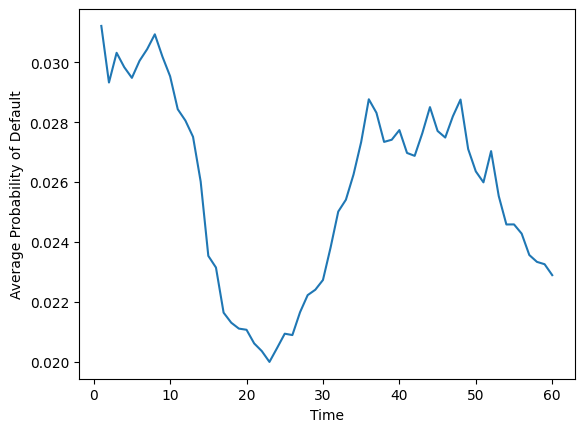

In [ ]:
import matplotlib.pyplot as plt

grouped_banking = banking_income.groupby('time')['fitted_PD'].mean()
plt.plot(grouped_banking.index, grouped_banking.values)
plt.xlabel('Time')
plt.ylabel('Average Probability of Default')
plt.show()

In [ ]:
banking_income.columns

Index(['year', 'state', 'income', 'state_time', 'id', 'time', 'orig_time',
       'first_time', 'mat_time', 'res_time', 'balance_time', 'LTV_time',
       'interest_rate_time', 'rate_time', 'hpi_time', 'gdp_time', 'uer_time',
       'REtype_CO_orig_time', 'REtype_PU_orig_time', 'REtype_SF_orig_time',
       'investor_orig_time', 'balance_orig_time', 'FICO_orig_time',
       'LTV_orig_time', 'Interest_Rate_orig_time', 'state_orig_time',
       'hpi_orig_time', 'default_time', 'payoff_time', 'status_time',
       'lgd_time', 'recovery_res', 'fitted_PD'],
      dtype='object')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Average Probability of Default')

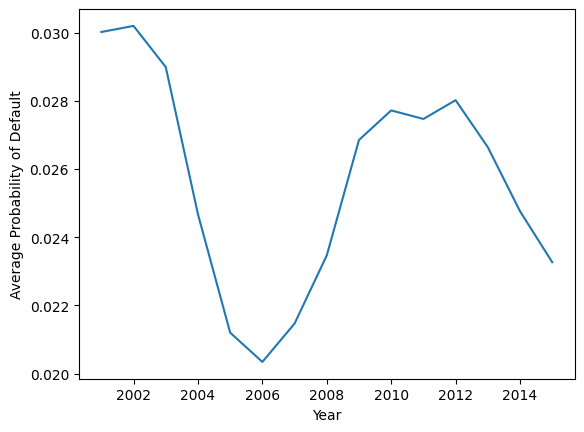

In [ ]:
import matplotlib.pyplot as plt

grouped_banking = banking_income.groupby('year')['fitted_PD'].mean()
plt.plot(grouped_banking.index, grouped_banking.values)
plt.xlabel('Year')
plt.ylabel('Average Probability of Default')
plt.show()

**Interpretation**:The plot shows how the probability of default changes over time. If the line is increasing, it suggests that the risk of default is increasing over time, and if it is decreasing, it suggests that the risk of default is decreasing over time. If the line is flat, it suggests that the risk of default is stable over time.Based on above plot PD started increasing after 2006 and kept increasing till 2010.Year after 2010-12 was a stable period.after 2012 the PDs started dipping again. 

Q2(b)Estimate the PD model again by including explanatory variables in part (a), and the state-level income growth from Question 1 in oneregression. Compute the estimated PD for all mortgage loans and periods. Plot the average probability of default by period in two separatecharts. Provide your code, an output for the model, the plots and interpret the output economically

In [ ]:
banking_income.columns

Index(['year', 'state', 'income', 'state_time', 'id', 'time', 'orig_time',
       'first_time', 'mat_time', 'res_time', 'balance_time', 'LTV_time',
       'interest_rate_time', 'rate_time', 'hpi_time', 'gdp_time', 'uer_time',
       'REtype_CO_orig_time', 'REtype_PU_orig_time', 'REtype_SF_orig_time',
       'investor_orig_time', 'balance_orig_time', 'FICO_orig_time',
       'LTV_orig_time', 'Interest_Rate_orig_time', 'state_orig_time',
       'hpi_orig_time', 'default_time', 'payoff_time', 'status_time',
       'lgd_time', 'recovery_res', 'fitted_PD'],
      dtype='object')

In [ ]:
growth_rate.head()
#growth_rate=growth_rate.reset_index()

,united_states,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,district_of_columbia,...,south_dakota,tennessee,texas,utah,vermont,virginia,washington,west_virginia,wisconsin,wyoming
year,,,,,,,,,,,,,,,,,,,,,
2002,0.004286,0.069482,-0.079999,-0.069549,-0.028555,0.003703,-0.022329,0.000750,0.000968,-0.050985,...,-0.045323,0.034849,-0.017401,0.010963,0.054052,-0.012141,0.063380,-0.010582,0.012283,0.001108
2003,0.021434,-0.009255,-0.017755,0.036040,-0.011887,0.039273,0.034083,0.029558,-0.012709,0.152905,...,0.043540,0.013314,-0.021869,0.029544,0.006093,0.103806,0.051457,0.115944,0.007973,0.070216
2004,0.023454,-0.016803,0.062234,0.065102,0.093182,-0.001582,0.018943,0.002456,-0.019788,-0.035365,...,0.040104,0.014631,0.054137,0.032390,0.094034,-0.066480,0.050812,0.018619,-0.011606,0.066784
2005,0.044932,0.014224,0.015037,0.031907,0.047850,0.051461,-0.008588,0.031488,0.066307,0.035488,...,0.049724,0.035039,0.000604,0.077490,0.071309,0.015115,0.014503,0.092050,-0.023660,-0.014957
2006,0.040474,0.021588,0.009429,0.031208,0.010884,0.068863,0.104026,0.097985,0.023480,0.077434,...,0.052745,0.032660,0.045507,-0.003375,0.025185,0.100262,0.080500,0.054164,0.157716,0.051948


In [ ]:
growth_rate.columns

Index(['united_states', 'alabama', 'alaska', 'arizona', 'arkansas',
       'california', 'colorado', 'connecticut', 'delaware',
       'district_of_columbia', 'florida', 'georgia', 'hawaii', 'idaho',
       'illinois', 'indiana', 'iowa', 'kansas', 'kentucky', 'louisiana',
       'maine', 'maryland', 'massachusetts', 'michigan', 'minnesota',
       'mississippi', 'missouri', 'montana', 'nebraska', 'nevada',
       'new_hampshire', 'new_jersey', 'new_mexico', 'new_york',
       'north_carolina', 'north_dakota', 'ohio', 'oklahoma', 'oregon',
       'pennsylvania', 'rhode_island', 'south_carolina', 'south_dakota',
       'tennessee', 'texas', 'utah', 'vermont', 'virginia', 'washington',
       'west_virginia', 'wisconsin', 'wyoming'],
      dtype='object')

In [ ]:
growth_rate.head()

,united_states,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,district_of_columbia,...,south_dakota,tennessee,texas,utah,vermont,virginia,washington,west_virginia,wisconsin,wyoming
year,,,,,,,,,,,,,,,,,,,,,
2002,0.004286,0.069482,-0.079999,-0.069549,-0.028555,0.003703,-0.022329,0.000750,0.000968,-0.050985,...,-0.045323,0.034849,-0.017401,0.010963,0.054052,-0.012141,0.063380,-0.010582,0.012283,0.001108
2003,0.021434,-0.009255,-0.017755,0.036040,-0.011887,0.039273,0.034083,0.029558,-0.012709,0.152905,...,0.043540,0.013314,-0.021869,0.029544,0.006093,0.103806,0.051457,0.115944,0.007973,0.070216
2004,0.023454,-0.016803,0.062234,0.065102,0.093182,-0.001582,0.018943,0.002456,-0.019788,-0.035365,...,0.040104,0.014631,0.054137,0.032390,0.094034,-0.066480,0.050812,0.018619,-0.011606,0.066784
2005,0.044932,0.014224,0.015037,0.031907,0.047850,0.051461,-0.008588,0.031488,0.066307,0.035488,...,0.049724,0.035039,0.000604,0.077490,0.071309,0.015115,0.014503,0.092050,-0.023660,-0.014957
2006,0.040474,0.021588,0.009429,0.031208,0.010884,0.068863,0.104026,0.097985,0.023480,0.077434,...,0.052745,0.032660,0.045507,-0.003375,0.025185,0.100262,0.080500,0.054164,0.157716,0.051948


In [ ]:
#the growth rates are stored in growth_rate df,make them ready for merging 
state_dict = {'united_states':'US', 'alabama': 'AL', 'alaska': 'AK', 'arizona': 'AZ', 'arkansas': 'AR', 'california': 'CA', 'colorado': 'CO', 'connecticut': 'CT', 'delaware': 'DE', 'district_of_columbia': 'DC', 'florida': 'FL', 'georgia': 'GA', 'hawaii': 'HI', 'idaho': 'ID', 'illinois': 'IL', 'indiana': 'IN', 'iowa': 'IA', 'kansas': 'KS', 'kentucky': 'KY', 'louisiana': 'LA', 'maine': 'ME', 'maryland': 'MD', 'massachusetts': 'MA', 'michigan': 'MI', 'minnesota': 'MN', 'mississippi': 'MS', 'missouri': 'MO', 'montana': 'MT', 'nebraska': 'NE', 'nevada': 'NV', 'new_hampshire': 'NH', 'new_jersey': 'NJ', 'new_mexico': 'NM', 'new_york': 'NY', 'north_carolina': 'NC', 'north_dakota': 'ND', 'ohio': 'OH', 'oklahoma': 'OK', 'oregon': 'OR', 'pennsylvania': 'PA', 'rhode_island': 'RI', 'south_carolina': 'SC', 'south_dakota': 'SD', 'tennessee': 'TN', 'texas': 'TX', 'utah': 'UT', 'vermont': 'VT', 'virginia': 'VA', 'washington': 'WA', 'west_virginia': 'WV', 'wisconsin': 'WI', 'wyoming': 'WY'}
growth_rate.columns = [state_dict[col.lower()] for col in growth_rate.columns]



In [ ]:
growth_rate=growth_rate.reset_index()

In [ ]:
growth_rate_long = pd.melt(growth_rate, id_vars='year', var_name='state', value_name='growth_rate')
growth_rate_long['state_time'] =  growth_rate_long['state']+ '_' + growth_rate_long['year'].astype(str)

In [ ]:
growth_rate_long.head()

,year,state,growth_rate,state_time
0,2002,US,0.004286,US_2002
1,2003,US,0.021434,US_2003
2,2004,US,0.023454,US_2004
3,2005,US,0.044932,US_2005
4,2006,US,0.040474,US_2006


In [ ]:
#now merge the dataframes
banking_income_grwth = pd.merge(growth_rate_long, banking_income, on='state_time')

In [ ]:
banking_income_grwth.head()

,year_x,state_x,growth_rate,state_time,year_y,state_y,income,id,time,orig_time,...,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,lgd_time,recovery_res,fitted_PD
0,2005,AL,0.014224,AL_2005,2005,AL,37150,759,19,19,...,80.0,0.00,AL,191.42,0,0,0,NaN,NaN,0.024932
1,2005,AL,0.014224,AL_2005,2005,AL,37150,759,20,19,...,80.0,0.00,AL,191.42,0,0,0,NaN,NaN,0.024233
2,2005,AL,0.014224,AL_2005,2005,AL,37150,1947,18,11,...,75.0,8.25,AL,142.18,1,0,1,0.314656,53504.42,0.023437
3,2005,AL,0.014224,AL_2005,2005,AL,37150,13352,18,18,...,86.1,10.99,AL,186.91,0,0,0,NaN,NaN,0.034837
4,2005,AL,0.014224,AL_2005,2005,AL,37150,13352,19,18,...,86.1,10.99,AL,186.91,0,0,0,NaN,NaN,0.033982


In [ ]:
banking_income.tail()

,year,state,income,state_time,id,time,orig_time,first_time,mat_time,res_time,...,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,lgd_time,recovery_res,fitted_PD
61409,2014,WY,55690,WY_2014,49885,56,28,52,148,NaN,...,100.0,0.0,WY,219.67,0,0,0,NaN,NaN,0.042687
61410,2015,WY,60925,WY_2015,49885,57,28,52,148,NaN,...,100.0,0.0,WY,219.67,0,0,0,NaN,NaN,0.041086
61411,2015,WY,60925,WY_2015,49885,58,28,52,148,NaN,...,100.0,0.0,WY,219.67,0,0,0,NaN,NaN,0.040649
61412,2015,WY,60925,WY_2015,49885,59,28,52,148,NaN,...,100.0,0.0,WY,219.67,0,0,0,NaN,NaN,0.040731
61413,2015,WY,60925,WY_2015,49885,60,28,52,148,NaN,...,100.0,0.0,WY,219.67,0,0,0,NaN,NaN,0.040157


In [ ]:
banking_income.shape
banking_income_grwth.shape

(61389, 33)

(61138, 36)

the shapes are different since it couldn't find matching rows for year=2001

Check if there are any missing rows

In [ ]:
banking_income_grwth.isnull().sum()

year_x                         0
state_x                        0
growth_rate                    0
state_time                     0
year_y                         0
state_y                        0
income                         0
id                             0
time                           0
orig_time                      0
first_time                     0
mat_time                       0
res_time                   59988
balance_time                   0
LTV_time                       0
interest_rate_time             0
rate_time                      0
hpi_time                       0
gdp_time                       0
uer_time                       0
REtype_CO_orig_time            0
REtype_PU_orig_time            0
REtype_SF_orig_time            0
investor_orig_time             0
balance_orig_time              0
FICO_orig_time                 0
LTV_orig_time                  0
Interest_Rate_orig_time        0
state_orig_time                0
hpi_orig_time                  0
default_ti

In [ ]:
#remove missing rows in growth rate
#banking_income_grwth = banking_income_grwth.dropna(subset=['growth_rate'])

In [ ]:
banking_income_grwth.head()

,year_x,state_x,growth_rate,state_time,year_y,state_y,income,id,time,orig_time,...,LTV_orig_time,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,lgd_time,recovery_res,fitted_PD
0,2005,AL,0.014224,AL_2005,2005,AL,37150,759,19,19,...,80.0,0.00,AL,191.42,0,0,0,NaN,NaN,0.024932
1,2005,AL,0.014224,AL_2005,2005,AL,37150,759,20,19,...,80.0,0.00,AL,191.42,0,0,0,NaN,NaN,0.024233
2,2005,AL,0.014224,AL_2005,2005,AL,37150,1947,18,11,...,75.0,8.25,AL,142.18,1,0,1,0.314656,53504.42,0.023437
3,2005,AL,0.014224,AL_2005,2005,AL,37150,13352,18,18,...,86.1,10.99,AL,186.91,0,0,0,NaN,NaN,0.034837
4,2005,AL,0.014224,AL_2005,2005,AL,37150,13352,19,18,...,86.1,10.99,AL,186.91,0,0,0,NaN,NaN,0.033982


PD modelling including growth rate

In [ ]:
import statsmodels.api as sm

# Specify the dependent variable and independent variables
y1 = banking_income_grwth['default_time']
X1 = banking_income_grwth[['LTV_time', 'FICO_orig_time','growth_rate']]



# oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X1_resampled, y1_resampled = smote.fit_resample(X1, y1)



#Fit the logistic regression model
logit_model1 = sm.Logit(y1_resampled, sm.add_constant(X1_resampled)).fit()

#Print the summary of the logistic regression model
print(logit_model1.summary())

,LTV_time,FICO_orig_time,growth_rate
0,79.250991,645,0.014224
1,75.998502,645,0.014224
2,56.558496,618,0.014224
3,40.112232,511,0.014224
4,37.242573,511,0.014224


0    0
1    0
2    1
3    0
4    0
Name: default_time, dtype: int64

Optimization terminated successfully.
         Current function value: 0.619879
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           default_time   No. Observations:               119254
Model:                          Logit   Df Residuals:                   119250
Method:                           MLE   Df Model:                            3
Date:                Sat, 13 May 2023   Pseudo R-squ.:                  0.1057
Time:                        08:04:36   Log-Likelihood:                -73923.
converged:                       True   LL-Null:                       -82661.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.9299      0.063     30.862      0.000       1.807       2.052
LTV_time         

In [ ]:
X1_resampled.head()
y1_resampled.head()

,LTV_time,FICO_orig_time,growth_rate
0,79.250991,645,0.014224
1,75.998502,645,0.014224
2,56.558496,618,0.014224
3,40.112232,511,0.014224
4,37.242573,511,0.014224


0    0
1    0
2    1
3    0
4    0
Name: default_time, dtype: int64

In [ ]:
X1 = sm.add_constant(X1)
banking_income_grwth["fitted_PD1"]=logit_model1.predict(X1)

In [ ]:
banking_income_grwth.columns

Index(['year_x', 'state_x', 'growth_rate', 'state_time', 'year_y', 'state_y',
       'income', 'id', 'time', 'orig_time', 'first_time', 'mat_time',
       'res_time', 'balance_time', 'LTV_time', 'interest_rate_time',
       'rate_time', 'hpi_time', 'gdp_time', 'uer_time', 'REtype_CO_orig_time',
       'REtype_PU_orig_time', 'REtype_SF_orig_time', 'investor_orig_time',
       'balance_orig_time', 'FICO_orig_time', 'LTV_orig_time',
       'Interest_Rate_orig_time', 'state_orig_time', 'hpi_orig_time',
       'default_time', 'payoff_time', 'status_time', 'lgd_time',
       'recovery_res', 'fitted_PD', 'fitted_PD1'],
      dtype='object')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Average Probability of Default')

Text(0.5, 1.0, 'PD when income growth included')

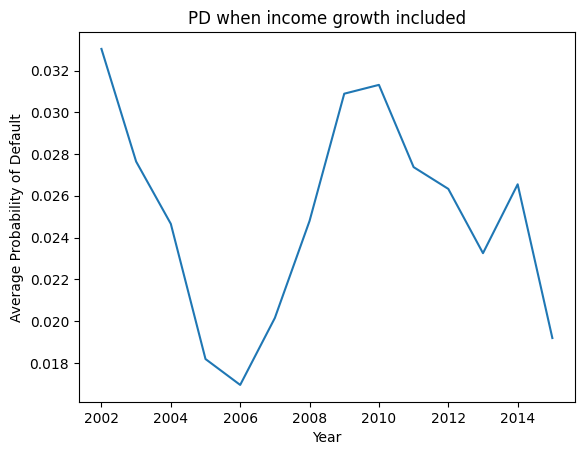

In [ ]:
import matplotlib.pyplot as plt

grouped_banking_growth = banking_income_grwth.groupby('year_x')['fitted_PD1'].mean()
plt.plot(grouped_banking_growth.index, grouped_banking_growth.values)
plt.xlabel('Year')
plt.ylabel('Average Probability of Default')
plt.title("PD when income growth included")
plt.show()

Text(0.5, 0, 'time')

Text(0, 0.5, 'Average Probability of Default')

Text(0.5, 1.0, 'PD when income grwth included')

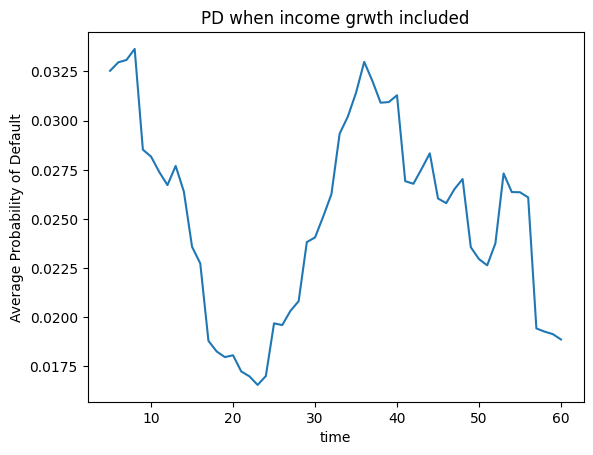

In [ ]:
import matplotlib.pyplot as plt

grouped_banking_growth1 = banking_income_grwth.groupby('time')['fitted_PD1'].mean()
plt.plot(grouped_banking_growth1.index, grouped_banking_growth1.values)
plt.xlabel('time')
plt.ylabel('Average Probability of Default')
plt.title("PD when income grwth included")
plt.show()

**Interpretation**:The plot shows how the probability of default changes over time. If the line is increasing, it suggests that the risk of default is increasing over time, and if it is decreasing, it suggests that the risk of default is decreasing over time. If the line is flat, it suggests that the risk of default is stable over time.Based on above plot PD started increasing after 2006 and kept increasing till 2009.Period from 2010-12 was a stable period with little increase in PD.after 2012 the PDs started dipping again till 2013 post which it started increasing again. 

Q2(c)Compare the accuracy of three models from sub-questions 2a and 2b. Present and explain your findings with regard to model accuracy

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Specify the dependent variable and independent variables for model1
#y = banking_income['default_time']
#X = banking_income[['LTV_time', 'FICO_orig_time']]

# Specify the dependent variable and independent variables for model2
#y1 = banking_income_grwth['default_time']
#X1 = banking_income_grwth[['LTV_time', 'FICO_orig_time','growth_rate']]

#since the data has time varibale,we should split the X,Y data based on time
# Sort the dataset by the time variable
banking_income1=banking_income.copy()
banking_income1 = banking_income1.sort_values('time')

# Determine the split point
split_point = int(len(banking_income1) * 0.8)  # Use the first 80% of the data for training

# Split the dataset into training and test sets
train_data = banking_income1.iloc[:split_point]
test_data = banking_income1.iloc[split_point:]


# Split the training and test sets into X (features) and y (target variable)
X_train = train_data[['LTV_time', 'FICO_orig_time']]
y_train = train_data['default_time']
X_test = test_data[['LTV_time', 'FICO_orig_time']]
y_test = test_data['default_time']

#similarly prepare the data for model2

banking_income2=banking_income_grwth.copy()
banking_income2 = banking_income2.sort_values('time')

# Determine the split point
split_point = int(len(banking_income2) * 0.8)  # Use the first 80% of the data for training

# Split the dataset into training and test sets
train_data1 = banking_income2.iloc[:split_point]
test_data1 = banking_income2.iloc[split_point:]
# Split the training and test sets into X (features) and y (target variable)
X1_train = train_data1[['LTV_time', 'FICO_orig_time','growth_rate']]
y1_train = train_data1['default_time']
X1_test = test_data1[['LTV_time', 'FICO_orig_time','growth_rate']]
y1_test = test_data1['default_time']

#since the dataset is unbalanced
# oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_train1_resampled, y_train1_resampled = smote.fit_resample(X1_train, y1_train)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=43)

# Train the first model
model1 = LogisticRegression()
model1.fit(X_train_resampled, y_train_resampled)

# Predict using the first model
y_pred1 = model1.predict(X_test)

# Calculate metrics for the first model
confusion_matrix1 = confusion_matrix(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)
f1_score1 = f1_score(y_test, y_pred1)

# Train the second model
model2 = LogisticRegression()
model2.fit(X_train1_resampled, y_train1_resampled)

# Predict using the second model
y_pred2 = model2.predict(X1_test)

# Calculate metrics for the second model
confusion_matrix2 = confusion_matrix(y1_test, y_pred2)
precision2 = precision_score(y1_test, y_pred2)
recall2 = recall_score(y1_test, y_pred2)
f1_score2 = f1_score(y1_test, y_pred2)

# Compare the metrics for both models
print("Model 1:")
print("Confusion matrix:\n", confusion_matrix1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1 score:", f1_score1)

print("\nModel 2:")
print("Confusion matrix:\n", confusion_matrix2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1 score:", f1_score2)


LogisticRegression()

LogisticRegression()

Model 1:
Confusion matrix:
 [[7402 4704]
 [  68  104]]
Precision: 0.021630615640599003
Recall: 0.6046511627906976
F1 score: 0.04176706827309237

Model 2:
Confusion matrix:
 [[7345 4713]
 [  64  106]]
Precision: 0.02199626478522515
Recall: 0.6235294117647059
F1 score: 0.04249348566847063


3(a) Compute the loss rate given default (LGD) for all mortgage loans and periods from the current loan to value ration LTV assuming a 40%house price decline for all loans in all future periods and no repayment of the outstanding loan amount.Compute the hypothetical LGD for allmortgage loans and periods. Plot a histogram for the distribution of the LGD. Provide your code, plots, and analyse the output economically

In [ ]:
banking_income_grwth.head()

,year_x,state_x,growth_rate,state_time,year_y,state_y,income,id,time,orig_time,...,Interest_Rate_orig_time,state_orig_time,hpi_orig_time,default_time,payoff_time,status_time,lgd_time,recovery_res,fitted_PD,fitted_PD1
0,2005,AL,0.014224,AL_2005,2005,AL,37150,759,19,19,...,0.00,AL,191.42,0,0,0,NaN,NaN,0.024932,0.024711
1,2005,AL,0.014224,AL_2005,2005,AL,37150,759,20,19,...,0.00,AL,191.42,0,0,0,NaN,NaN,0.024233,0.024055
2,2005,AL,0.014224,AL_2005,2005,AL,37150,1947,18,11,...,8.25,AL,142.18,1,0,1,0.314656,53504.42,0.023437,0.023514
3,2005,AL,0.014224,AL_2005,2005,AL,37150,13352,18,18,...,10.99,AL,186.91,0,0,0,NaN,NaN,0.034837,0.035405
4,2005,AL,0.014224,AL_2005,2005,AL,37150,13352,19,18,...,10.99,AL,186.91,0,0,0,NaN,NaN,0.033982,0.034584


In [ ]:
banking_income_grwth.columns

Index(['year_x', 'state_x', 'growth_rate', 'state_time', 'year_y', 'state_y',
       'income', 'id', 'time', 'orig_time', 'first_time', 'mat_time',
       'res_time', 'balance_time', 'LTV_time', 'interest_rate_time',
       'rate_time', 'hpi_time', 'gdp_time', 'uer_time', 'REtype_CO_orig_time',
       'REtype_PU_orig_time', 'REtype_SF_orig_time', 'investor_orig_time',
       'balance_orig_time', 'FICO_orig_time', 'LTV_orig_time',
       'Interest_Rate_orig_time', 'state_orig_time', 'hpi_orig_time',
       'default_time', 'payoff_time', 'status_time', 'lgd_time',
       'recovery_res', 'fitted_PD', 'fitted_PD1'],
      dtype='object')

To compute the Loss Given Default (LGD) for all mortgage loans and periods from the current Loan-to-Value ratio (LTV), we can use the following formula:

LGD = (1 - Recovery Rate) * (1 + Discount Rate)^(Default Time) * (1 - LTV / (1 - HPI))

Where:

Recovery Rate: the percentage of the outstanding loan amount that is recovered through the sale of the foreclosed property
Discount Rate: the interest rate used to discount future cash flows to their present value
Default Time: the number of periods from the current period to the time of default
LTV: the current loan-to-value ratio
HPI: the expected house price decline at the time of default
Assuming a 40% house price decline and no repayment of the outstanding loan amount, we can set HPI = 0.4 and Recovery Rate = 0.6 (assuming that 60% of the outstanding loan amount can be recovered through the sale of the foreclosed property). We can also assume a discount rate of 5%.

We can then calculate the LGD for each period by iterating over the periods and using the above formula.

In [ ]:
unique_times = banking_income_grwth['time'].unique()
print(unique_times)

[19 20 18 17 21 22 23 24 25 27 28 26 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 59 60 57 58  5  6  7  8
 12  9 10 11 13 14 15 16]


In [ ]:
# Set parameters
recovery_rate = 0.6
hpi = 0.4
banking_income_grwth["lgd_hypo"] = ((1 - recovery_rate) * (1 + (banking_income_grwth["interest_rate_time"])/100)**((banking_income_grwth["mat_time"]-banking_income_grwth["time"])/12) * (1 -  (banking_income_grwth["LTV_orig_time"]/100)/0.6 ))*banking_income_grwth["balance_orig_time"]

In [ ]:
banking_income_grwth["lgd_hypo"].head(30)

0    -18848.882113
1    -18719.738576
2    -16612.946563
3     -5728.220288
4     -5678.662485
5     -5629.533431
6    -12383.146262
7    -12292.282378
8    -12202.085226
9    -30446.125090
10   -30239.844194
11   -30034.960907
12   -29831.465761
13   -16161.120379
14   -44306.427301
15   -39585.792385
16   -13751.315600
17   -14504.555575
18   -18591.479869
19   -18701.350308
20   -18571.081385
21   -19629.708068
22    -9674.278704
23    -5580.829419
24    -5532.546770
25    -5484.681840
26    -5437.231014
27   -12112.549914
28   -12023.671586
29   -11935.445420
Name: lgd_hypo, dtype: float64

In [ ]:
(banking_income_grwth["mat_time"][0]-banking_income_grwth["time"][0])/4

28.5

In [ ]:
banking_income_grwth["mat_time"][0]

133

In [ ]:
1 -  banking_income_grwth["LTV_time"][0]/ (1 - hpi)

-131.08498554333335

In [ ]:
#We now subsample the default events from our mortgage data:
data_default = banking_income_grwth.query('default_time==1').copy()
data_default.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1511 entries, 2 to 61090
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year_x                   1511 non-null   int64  
 1   state_x                  1511 non-null   object 
 2   growth_rate              1511 non-null   float64
 3   state_time               1511 non-null   object 
 4   year_y                   1511 non-null   int64  
 5   state_y                  1511 non-null   object 
 6   income                   1511 non-null   int64  
 7   id                       1511 non-null   int64  
 8   time                     1511 non-null   int64  
 9   orig_time                1511 non-null   int64  
 10  first_time               1511 non-null   int64  
 11  mat_time                 1511 non-null   int64  
 12  res_time                 1150 non-null   float64
 13  balance_time             1511 non-null   float64
 14  LTV_time               

In [ ]:
#We now looks at the four time stamps orig_time, time, res_time, mat_time to better understand the loss process:
data_default[['orig_time', 'time', 'res_time', 'mat_time']]

,orig_time,time,res_time,mat_time
2,11,18,30.0,131
13,11,19,34.0,131
88,24,27,31.0,145
122,10,28,28.0,130
282,27,34,37.0,148
...,...,...,...,...
61008,26,42,NaN,146
61030,26,46,NaN,146
61064,27,55,60.0,123
61074,18,54,NaN,139


**Time to default**

In [ ]:
#We can calculate the time from origination to default (TTD) of a loan:
data_default.loc[:,'ttd_period'] = data_default.loc[:,'time'] - data_default.loc[:,'orig_time'] 
data_default.loc[:,'ttd_period'].describe()

count    1511.000000
mean       12.966909
std         8.430642
min         0.000000
25%         7.000000
50%        11.000000
75%        17.000000
max        63.000000
Name: ttd_period, dtype: float64

array([[<Axes: title={'center': 'ttd_period'}>]], dtype=object)

Text(0.5, 0, 'TTD')

Text(0.5, 0, 'Frequency')

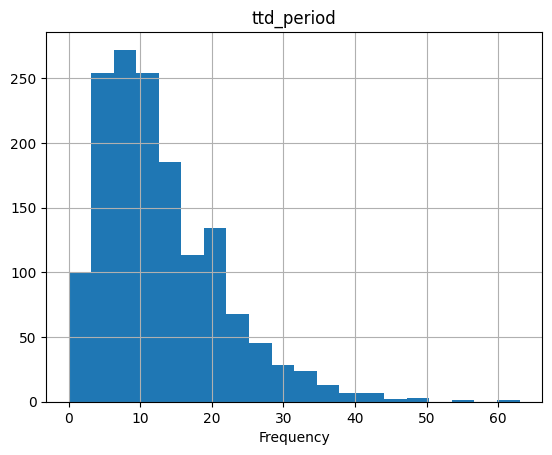

In [ ]:
data_default[['ttd_period']].hist(bins=20)
plt.xlabel('TTD')
plt.xlabel('Frequency')
plt.show()

**Time to resolution**

In [ ]:
#We can calculate the time from default to resolution of a loan:
data_default.loc[:,'res_period']=data_default.loc[:,'res_time']-data_default.loc[:,'time']

In [ ]:
data_default[['res_period']].describe()

,res_period
count,1150.000000
mean,6.660000
std,5.138979
min,0.000000
25%,3.000000
50%,5.000000
75%,8.000000
max,37.000000


**Calculation of LGD**

In [ ]:
# Calculate LGD
discount_rate = 1 / (1 + data_default.loc[:, 'rate_time'] / (100 * 4))

# Calculate expected recovery given no repayments
expected_recovery = (1 - 0.4) * data_default.loc[:, 'balance_time']

# Calculate discounted expected recovery
discounted_recovery = expected_recovery * discount_rate ** data_default.loc[:, 'res_period']

# Calculate LGD
data_default.loc[:, 'LGD'] = (data_default.loc[:, 'balance_time'] - discounted_recovery) / data_default.loc[:, 'balance_time']



In [ ]:
data_default.loc[:,'LGD'].describe()

count    1150.000000
mean        0.443530
std         0.031832
min         0.400000
25%         0.420778
50%         0.433691
75%         0.457083
max         0.583273
Name: LGD, dtype: float64

In [ ]:
data_default.loc[:,'LGD'].describe()

count    1150.000000
mean        0.443530
std         0.031832
min         0.400000
25%         0.420778
50%         0.433691
75%         0.457083
max         0.583273
Name: LGD, dtype: float64

array([[<Axes: title={'center': 'LGD'}>]], dtype=object)

Text(0.5, 0, 'LGD')

Text(0.5, 0, 'Frequency')

Text(0.5, 1.0, 'Distribution of hypothetical LGD')

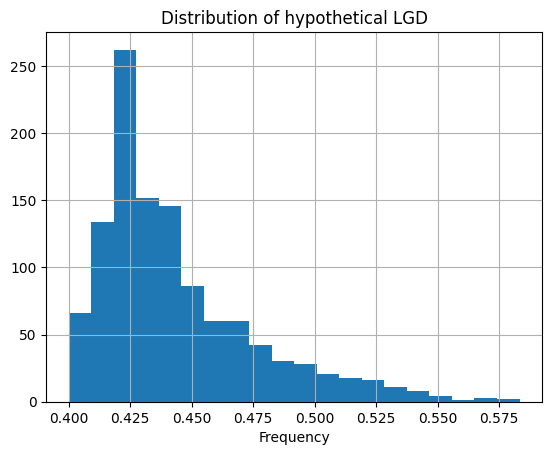

In [ ]:
data_default[['LGD']].hist(bins=20)
plt.xlabel('LGD')
plt.xlabel('Frequency')
plt.title("Distribution of hypothetical LGD")
plt.show()

In [ ]:
LGD_mean=data_default.groupby('time')[['LGD']].count().reset_index(drop=False)


**LGD with resolutionbias**

Text(0.5, 0, 'Time')

Text(0, 0.5, 'LGD')

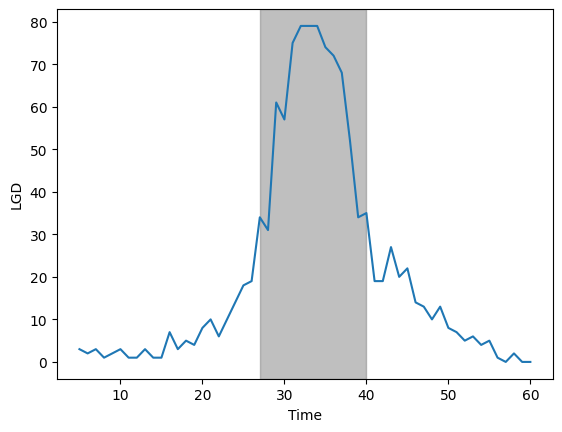

In [ ]:
plt.plot('time','LGD', data=LGD_mean)
plt.axvspan(27, 40, color="grey", alpha=0.5)
plt.xlabel('Time')
plt.ylabel('LGD')
plt.show()

Q3(b)Run a linear regression model to predict LGD. Include the same set of explanatory variables used in the question 2b. Compute the estimatedLGD for all mortgage loans and periods. Plot the average LGD by period. Provide your code, output, plot and interpret the outputeconomically.

LGD models

In [ ]:
data_default1 =data_default[['LTV_time', 'FICO_orig_time','growth_rate', 'default_time','time','LGD']].dropna()


In [ ]:
data_default1.shape
#data_dafault.shape

(1150, 6)

In [ ]:
data_default.shape

(1511, 41)

In [ ]:
data_default.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1511 entries, 2 to 61090
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year_x                   1511 non-null   int64  
 1   state_x                  1511 non-null   object 
 2   growth_rate              1511 non-null   float64
 3   state_time               1511 non-null   object 
 4   year_y                   1511 non-null   int64  
 5   state_y                  1511 non-null   object 
 6   income                   1511 non-null   int64  
 7   id                       1511 non-null   int64  
 8   time                     1511 non-null   int64  
 9   orig_time                1511 non-null   int64  
 10  first_time               1511 non-null   int64  
 11  mat_time                 1511 non-null   int64  
 12  res_time                 1150 non-null   float64
 13  balance_time             1511 non-null   float64
 14  LTV_time               

In [ ]:
data_default.isnull().sum()


year_x                       0
state_x                      0
growth_rate                  0
state_time                   0
year_y                       0
state_y                      0
income                       0
id                           0
time                         0
orig_time                    0
first_time                   0
mat_time                     0
res_time                   361
balance_time                 0
LTV_time                     0
interest_rate_time           0
rate_time                    0
hpi_time                     0
gdp_time                     0
uer_time                     0
REtype_CO_orig_time          0
REtype_PU_orig_time          0
REtype_SF_orig_time          0
investor_orig_time           0
balance_orig_time            0
FICO_orig_time               0
LTV_orig_time                0
Interest_Rate_orig_time      0
state_orig_time              0
hpi_orig_time                0
default_time                 0
payoff_time                  0
status_t

In [ ]:
data_default1.isnull().sum()

LTV_time          0
FICO_orig_time    0
growth_rate       0
default_time      0
time              0
LGD               0
dtype: int64

In [ ]:
data_default["LGD"].head()

2      0.464834
13     0.479917
88     0.428295
122    0.400000
282    0.420705
Name: LGD, dtype: float64

In [ ]:
#drop missing
data_default = data_default.dropna(subset=['LGD'])

In [ ]:
data_default1.head()

,LTV_time,FICO_orig_time,growth_rate,default_time,time,LGD
2,56.558496,618,0.014224,1,18,0.464834
13,58.559986,542,0.014224,1,19,0.479917
88,100.469950,582,0.112247,1,27,0.428295
122,46.273091,535,0.112247,1,28,0.400000
282,108.390068,613,-0.101088,1,34,0.420705


There seem to be no missing values

In [ ]:
import statsmodels.api as sm

# Specify the dependent variable and independent variables
y1 = data_default['LGD']
X1 = data_default[['LTV_time', 'FICO_orig_time','growth_rate']]

X1.head()
y1.head()

#Fit the linear reg regression model
ols_model_LGD = sm.OLS(y1, sm.add_constant(X1)).fit()

#Print the summary of the logistic regression model
print(ols_model_LGD.summary())

,LTV_time,FICO_orig_time,growth_rate
2,56.558496,618,0.014224
13,58.559986,542,0.014224
88,100.469950,582,0.112247
122,46.273091,535,0.112247
282,108.390068,613,-0.101088


2      0.464834
13     0.479917
88     0.428295
122    0.400000
282    0.420705
Name: LGD, dtype: float64

                            OLS Regression Results                            
Dep. Variable:                    LGD   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     4.681
Date:                Sat, 13 May 2023   Prob (F-statistic):            0.00296
Time:                        07:33:12   Log-Likelihood:                 2340.1
No. Observations:                1150   AIC:                            -4672.
Df Residuals:                    1146   BIC:                            -4652.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4745      0.009     50.

The regression output is for a linear regression model that predicts the LGD based on three explanatory variables: LTV_time, FICO_orig_time, and growth_rate.

The R-squared value of 0.012 indicates that only 1.2% of the variability in the LGD can be explained by the model, which suggests that the model is not a good fit for the data.

The coefficients show the estimated impact of each explanatory variable on the LGD, holding all other variables constant. The intercept (const) coefficient of 0.4745 represents the estimated LGD when all explanatory variables are 0. The coefficient for LTV_time is not statistically significant (p-value > 0.05), which suggests that this variable does not have a significant impact on the LGD. The coefficient for FICO_orig_time is statistically significant (p-value < 0.05) and negative, which indicates that higher FICO_orig_time (better credit scores) are associated with lower LGD. The coefficient for growth_rate is not statistically significant (p-value > 0.05), which suggests that this variable does not have a significant impact on the LGD.

Overall, the model does not appear to be a good fit for the data, as the R-squared value is very low and only one of the explanatory variables (FICO_orig_time) has a statistically significant impact on the LGD.

<ipython-input-106-49fdd8a4dc99>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_default['LGD_pred'] = ols_model_LGD.predict(X1)


Text(0.5, 0, 'Time')

Text(0, 0.5, 'Average LGD')

Text(0.5, 1.0, 'Average LGD by Period')

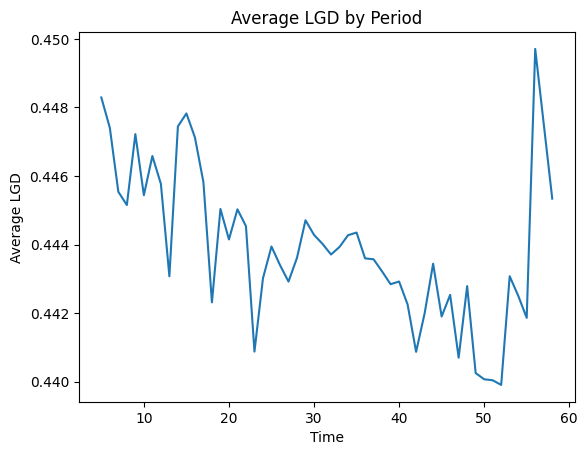

In [ ]:
# Predict LGD for all mortgage loans and periods
X1 = sm.add_constant(X1)
data_default['LGD_pred'] = ols_model_LGD.predict(X1)

# Plot average LGD by period
avg_lgd_by_period = data_default.groupby('time')['LGD_pred'].mean()
plt.plot(avg_lgd_by_period.index, avg_lgd_by_period.values)
plt.xlabel('Time')
plt.ylabel('Average LGD')
plt.title('Average LGD by Period')
plt.show()

The chart output shows the average predicted LGD by period (time) based on the regression model. It suggests that predicted LGD tends to decrease over time.There is blip towards the end of period which may be corrected by removing the resoution bias. However, it is important to note that this is based on a model and the actual LGD values may differ. 

3(c)Explain how income may be a potential driver of LGD? Suggest, next to income and any other features you have used in 3b, two additionalfeatures that you think can explain for mortgage LGD


**Answer**:Income can potentially be a driver of LGD because it is directly related to a borrower's ability to repay their mortgage. A higher income would indicate a higher ability to make payments, which in turn would lead to a lower probability of default and a lower LGD.

Other features which may be useful to predict LGD could be:

State_orig_time: US state in which the property is located. This feature may be useful as LGD could vary based on the economic conditions and real estate market in different states.

Investor_orig_time: Investor borrower: 1, otherwise: 0. This feature may be useful as investors may have different default probabilities and behavior than non-investors, which could impact LGD.

In [ ]:
data_default.head()

,year_x,state_x,growth_rate,state_time,year_y,state_y,income,id,time,orig_time,...,status_time,lgd_time,recovery_res,fitted_PD,fitted_PD1,lgd_hypo,ttd_period,res_period,LGD,LGD_pred
2,2005,AL,0.014224,AL_2005,2005,AL,37150,1947,18,11,...,1,0.314656,53504.42,0.023437,0.023514,-16612.946563,7,12.0,0.464834,0.444110
13,2005,AL,0.014224,AL_2005,2005,AL,37150,25915,19,11,...,1,0.883625,6422.56,0.034989,0.035197,-16161.120379,8,15.0,0.479917,0.447939
88,2007,AL,0.112247,AL_2007,2007,AL,42212,25619,27,24,...,1,0.715370,15632.64,0.041137,0.024125,-41382.227687,3,4.0,0.428295,0.442787
122,2007,AL,0.112247,AL_2007,2007,AL,42212,47380,28,10,...,1,0.000000,38130.87,0.032579,0.019585,-10613.559229,18,0.0,0.400000,0.444146
282,2009,AL,-0.101088,AL_2009,2009,AL,39980,42961,34,27,...,1,1.139980,-6977.75,0.037733,0.067131,-20715.135132,7,3.0,0.420705,0.449913


4)Compute the level of expected one-period loss for all mortgage loans and periods. PD should be inferred from question 2b and LGD should beinferred from question 3b. You may set the exposure at default to one dollar so that risk measures can be interpreted in percentages. Plot theaverage expected loss by time period in a charts. Provide your code, plots and analyse the output economically.

To calculate the expected one-period loss for all mortgage loans and periods, we need to use the Probability of Default (PD) and Loss Given Default (LGD) values that were calculated previously. The exposure at default is assumed to be one dollar so that risk measures can be interpreted in percentages.

The expected one-period loss (EOL) can be calculated using the following formula:

EOL = PD x LGD x Exposure at Default

Since exposure at default is one dollar, we can simplify the formula as:

EOL = PD x LGD

In [ ]:
data_default["EOL"]=data_default["fitted_PD1"]* data_default["LGD_pred"]

In [ ]:
data_default["EOL"].describe()

count    1150.000000
mean        0.013913
std         0.005710
min         0.003643
25%         0.009688
50%         0.012889
75%         0.017339
max         0.050786
Name: EOL, dtype: float64

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Average EOL')

Text(0.5, 1.0, 'Average EOL by Period')

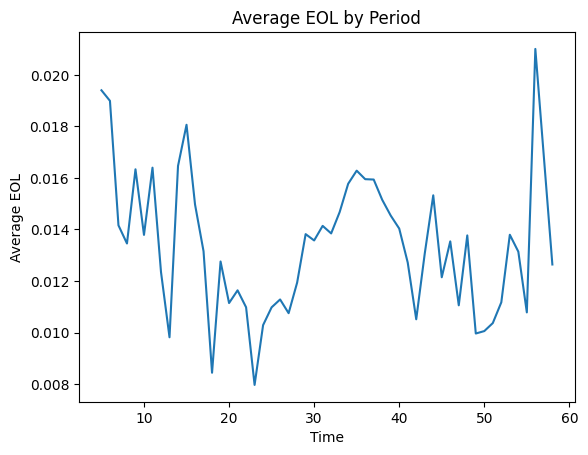

In [ ]:
# Plot average EOL by period
avg_eol_by_period = data_default.groupby('time')['EOL'].mean()
plt.plot(avg_eol_by_period.index, avg_eol_by_period.values)
plt.xlabel('Time')
plt.ylabel('Average EOL')
plt.title('Average EOL by Period')
plt.show()

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Average EOL')

Text(0.5, 1.0, 'Average EOL by Year')

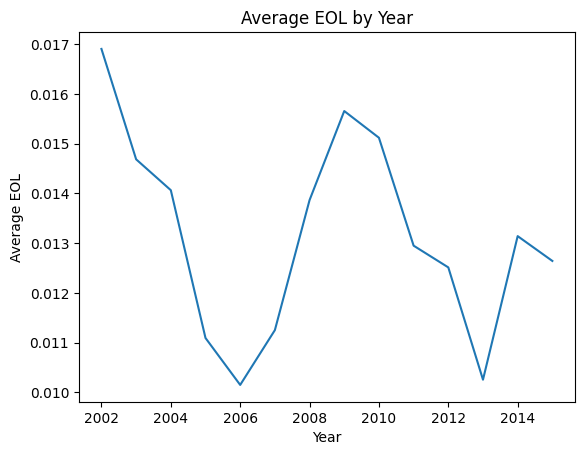

In [ ]:
# Plot average EOL by period
avg_eol_by_period = data_default.groupby('year_x')['EOL'].mean()
plt.plot(avg_eol_by_period.index, avg_eol_by_period.values)
plt.xlabel('Year')
plt.ylabel('Average EOL')
plt.title('Average EOL by Year')
plt.show()

EOL started increasing around the period of GFC(2007 onwards).It Kept rising untill 2009 and went into a stable period till 2011.After 2011 untill 2013 it startd decreasing sharply due to opening up of US economy again.

5)Bank capital allocation [8 marks]
Compute the Basel capital ratio for all mortgage loans and periods using the internal ratings based approach. Assume correlation at 15%. PDshould be inferred from question 2b and LGD should be inferred from question 3b. You may set the exposure to default to one unit or use actualloan amounts. Plot the average capital ratio by time in two separate charts. Provide your code, plots and analyse the output economically.

In [ ]:
data2=banking_income_grwth.copy()
data2 = pd.merge(data2, data_default[['id', 'LGD_pred']], on='id', how='left')


Text(0.5, 0, 'Time')

Text(0, 0.5, 'Default Rate, mean PD')

<Figure size 1000x1500 with 0 Axes>

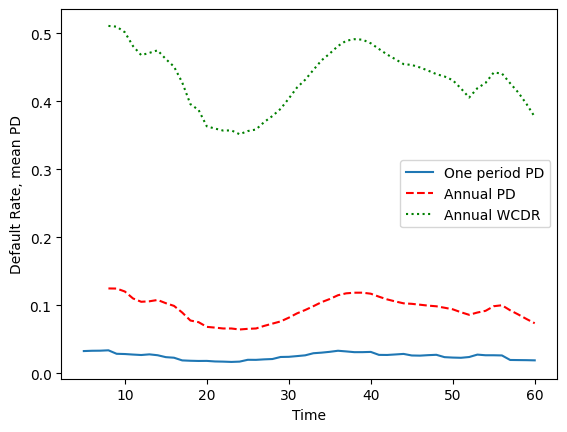

<Figure size 1000x1500 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
from math import *
#data2=banking_income_grwth.copy()
data2.loc[:,'PD4'] = data2.loc[:,'fitted_PD1']

data2 = data2.sort_values(by=['id', 'time'])

data2.loc[:,'PD3'] = data2.groupby(['id'])['PD4'].shift(1)
data2.loc[:,'PD2'] = data2.groupby(['id'])['PD4'].shift(2)
data2.loc[:,'PD1'] = data2.groupby(['id'])['PD4'].shift(3)

data2.loc[:,'PD_annual'] = data2.loc[:,'PD1']+(1-data2.loc[:,'PD1'])*data2.loc[:,'PD2']+(1-data2.loc[:,'PD1'])*(1-data2.loc[:,'PD2'])*data2.loc[:,'PD3']+(1-data2.loc[:,'PD1'])*(1-data2.loc[:,'PD2'])*(1-data2.loc[:,'PD3'])*data2.loc[:,'PD4']

data2.loc[:,'WCDR_annual'] = norm.cdf((norm.ppf(data2.loc[:,'PD_annual']) + sqrt(0.15) * norm.ppf(0.999)) / sqrt(1-0.15))

data_mean = data2.groupby('time')[['PD4', 'PD_annual', 'WCDR_annual']].mean().reset_index(drop=False)

plt.plot('time','PD4',data=data_mean,label='One period PD')
plt.plot('time','PD_annual',data=data_mean,color='red',label='Annual PD',linestyle='dashed')
plt.plot('time','WCDR_annual',data=data_mean,color='green',label='Annual WCDR',linestyle='dotted')
plt.xlabel('Time')
plt.ylabel('Default Rate, mean PD')
plt.legend(loc='best')
plt.figure(figsize=(10, 15))
plt.show()


In [ ]:
data2["LGD_pred"].describe()
data_default["LGD_pred"].describe()

count    10849.000000
mean         0.442973
std          0.003659
min          0.433911
25%          0.440238
50%          0.442969
75%          0.445535
max          0.454338
Name: LGD_pred, dtype: float64

count    1150.000000
mean        0.443530
std         0.003502
min         0.433911
25%         0.440995
50%         0.443591
75%         0.445893
max         0.454338
Name: LGD_pred, dtype: float64

**Basel capital ratio 𝐶𝑉𝑎𝑅=(𝑊𝐶𝐷𝑅−𝑃𝐷)∗𝐷𝐿𝐺𝐷∗𝐷𝐸𝐴𝐷**

In [ ]:
data2['basel_rate']=(data2['WCDR_annual']-data2['PD4'] )*data2["LGD_pred"]*data2['balance_time']

In [ ]:
data2['basel_rate'].head()

31315   NaN
31316   NaN
31317   NaN
31318   NaN
31348   NaN
Name: basel_rate, dtype: float64

In [ ]:
selected = data2.loc[:,["basel_rate","WCDR_annual","PD4","balance_time","LGD_pred","PD_annual","PD4","PD1","PD2","PD3"]]
print(selected)

       basel_rate  WCDR_annual       PD4  balance_time  LGD_pred  PD_annual  \
31315         NaN          NaN  0.024754      61031.10       NaN        NaN   
31316         NaN          NaN  0.024774      60882.42       NaN        NaN   
31317         NaN          NaN  0.024841      60729.80       NaN        NaN   
31318         NaN     0.452544  0.024911      60576.14       NaN   0.095645   
31348         NaN     0.440646  0.019764      60424.39       NaN   0.091017   
...           ...          ...       ...           ...       ...        ...   
569           NaN          NaN  0.014655     180673.24       NaN        NaN   
636           NaN          NaN  0.038899     179944.95       NaN        NaN   
637           NaN          NaN  0.037691     179451.81       NaN        NaN   
638           NaN     0.515759  0.037597     178952.48       NaN   0.122940   
639           NaN     0.556356  0.037387     178952.48       NaN   0.143174   

            PD4       PD1       PD2       PD3  
313

In [ ]:
data2['basel_rate'].describe()

count      7603.000000
mean      46406.790306
std       31910.153252
min        1838.626705
25%       22833.990364
50%       37983.889731
75%       60494.296465
max      223772.294074
Name: basel_rate, dtype: float64

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Average Basel Rate')

Text(0.5, 1.0, 'Average Basel by Year')

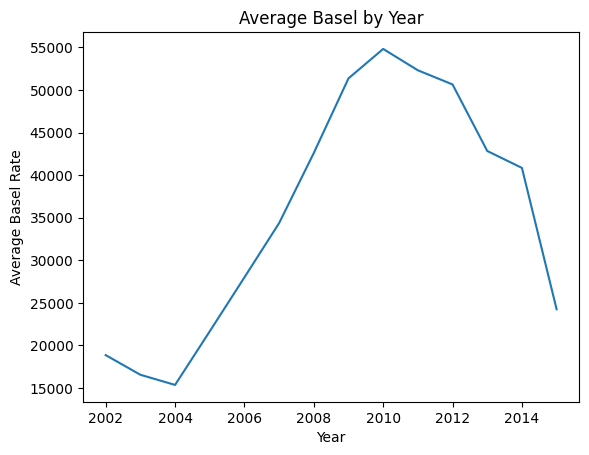

In [ ]:
# Plot average Basel rate by period
avg_basel_by_period = data2.groupby('year_x')['basel_rate'].mean()
plt.plot(avg_basel_by_period.index, avg_basel_by_period.values)
plt.xlabel('Year')
plt.ylabel('Average Basel Rate')
plt.title('Average Basel by Year')
plt.show()

Text(0.5, 0, 'period')

Text(0, 0.5, 'Average Basel Rate')

Text(0.5, 1.0, 'Average Basel by time')

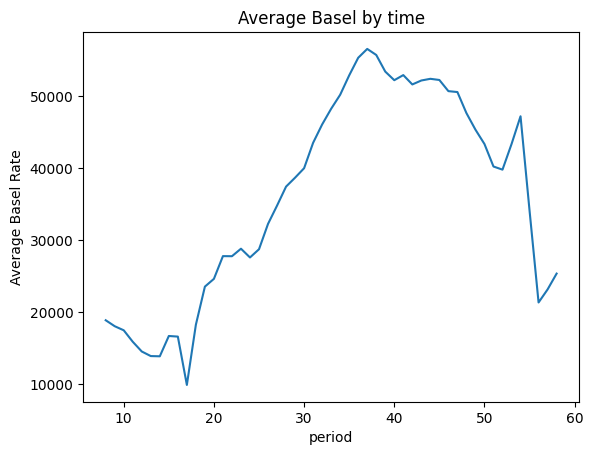

In [ ]:
# Plot average Basel rate by period
avg_basel_by_time = data2.groupby('time')['basel_rate'].mean()
plt.plot(avg_basel_by_time.index, avg_basel_by_time.values)
plt.xlabel('period')
plt.ylabel('Average Basel Rate')
plt.title('Average Basel by time')
plt.show()

An increasing trend for Basel rate across the years indicates that the cost of borrowing money for banks is increasing. Basel rate is the minimum reserve requirement that banks are required to maintain, and it is set by the central bank of a country. When the Basel rate increases, it becomes more expensive for banks to borrow money from the central bank, which in turn leads to higher interest rates for borrowers.

Higher interest rates for borrowers can have a number of impacts. It may reduce borrowing and investment in the economy, slow down economic growth, and cause inflation to decrease. Higher interest rates may also make it more difficult for borrowers to repay their loans, which can increase the risk of default for banks. This is why Basel rate is an important indicator for the health of the banking sector and the overall economy.

**Import to word**

In [ ]:
# export to word
!pip install pandoc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.7/126.7 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.0 MB/s eta 0:00:00
  Created wheel for pandoc: filename=pandoc-2.3-py3-none-any.whl size=33262 sha256=824aa67b531bc6df4d584681b428409aff50698f5e8dabdac2dad5aa88edae83
  Stored in directory: /root/.cache/pip/wheels/76/27/c2/c26175310aadcb8741b77657a1bb49c50cc7d4cdbf9eee0005
Successfully built pandoc


In [ ]:
import pandoc

In [ ]:
#you can run this in local jupyter terminal 
#!jupyter nbconvert Bank_lending_and_analytics.ipynb --to html 

[NbConvertApp] WARNING | pattern 'Bank_lending_and_analytics.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True

In [ ]:
# Run this in power shell for windows
#pandoc jupyter_file.ipynb -s -o new_word_file.docx

SyntaxError: ignored